In [1]:
!pip install pandas numpy seaborn matplotlib scikit-learn


In [23]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Estadísticas descriptivas:
       fixed acidity  volatile acidity  citric acid  residual sugar 

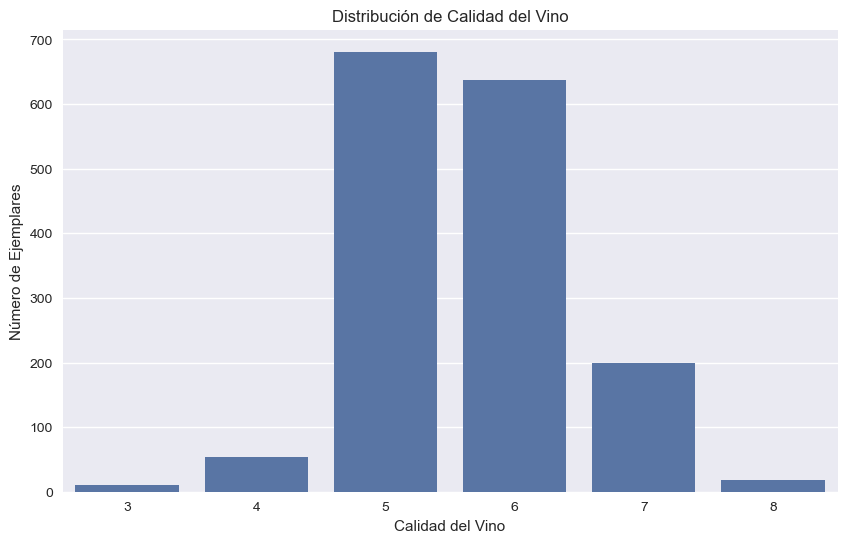

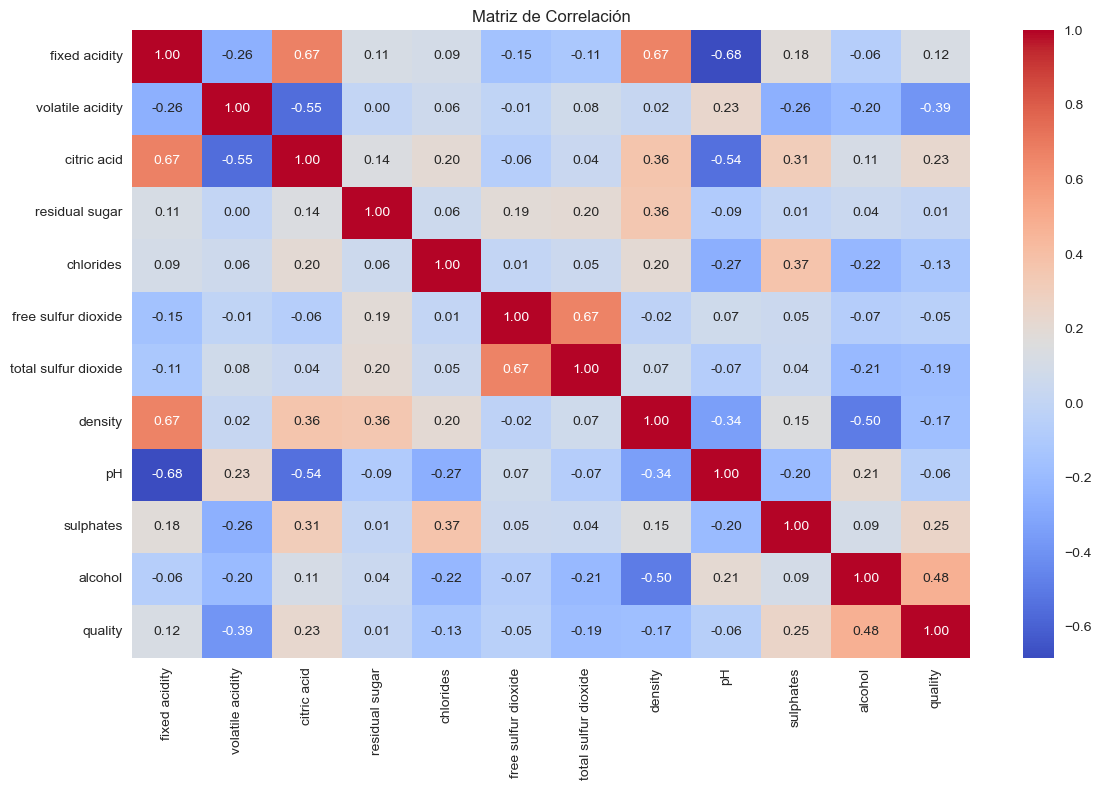

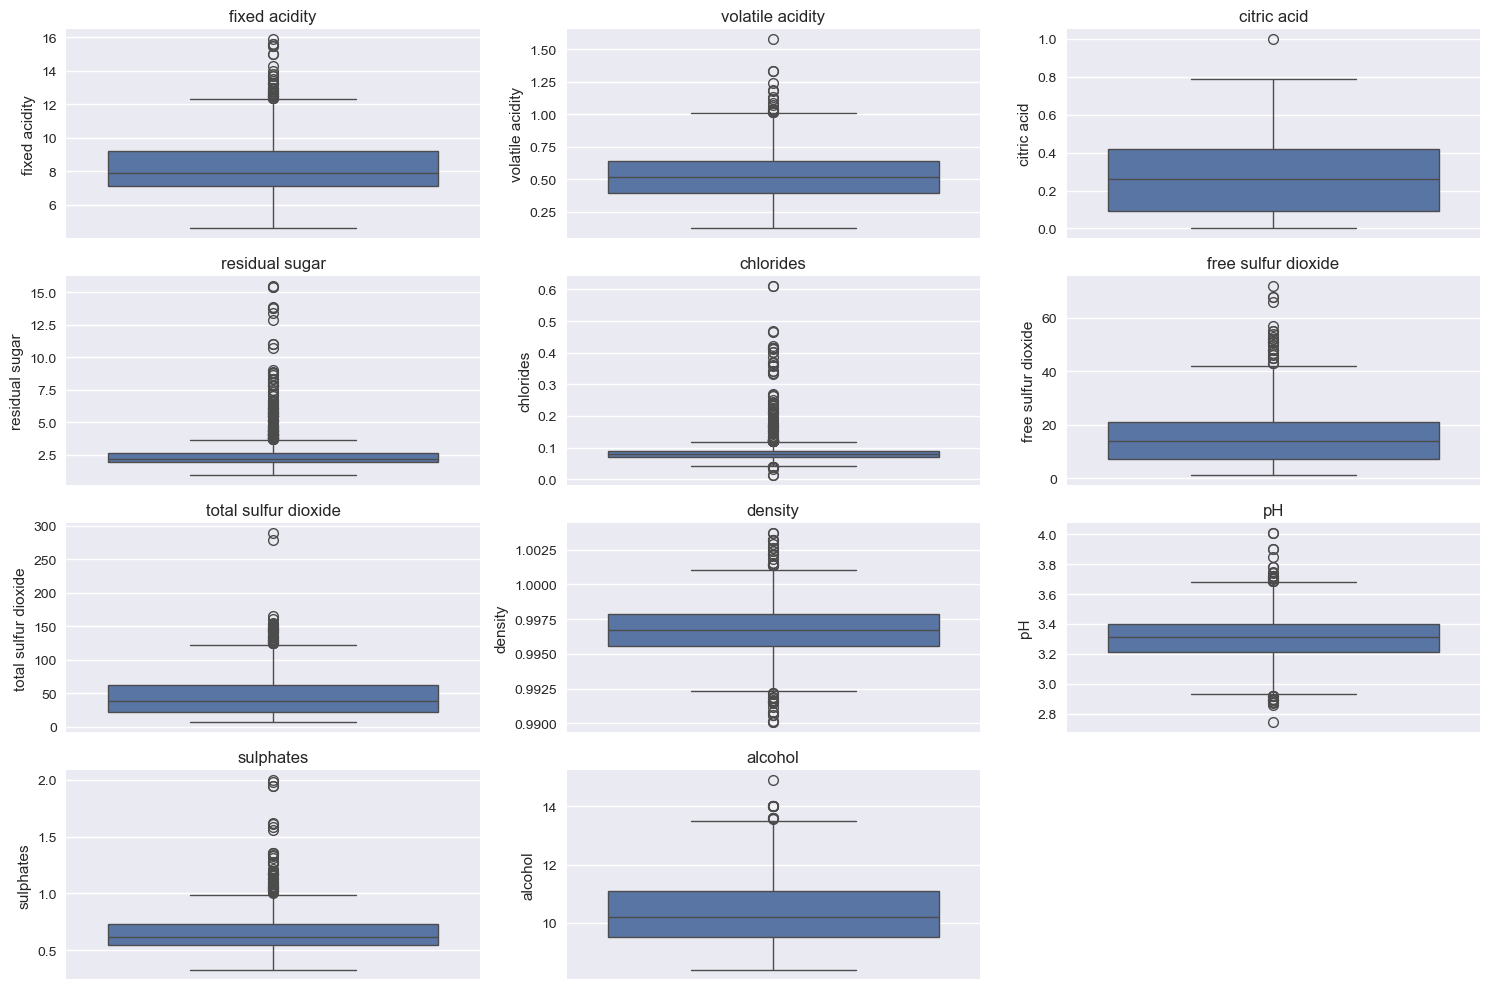


Características seleccionadas:
['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

Métricas de evaluación:
Accuracy: 0.462
Precision: 0.466
Recall: 0.462
F1-score: 0.444


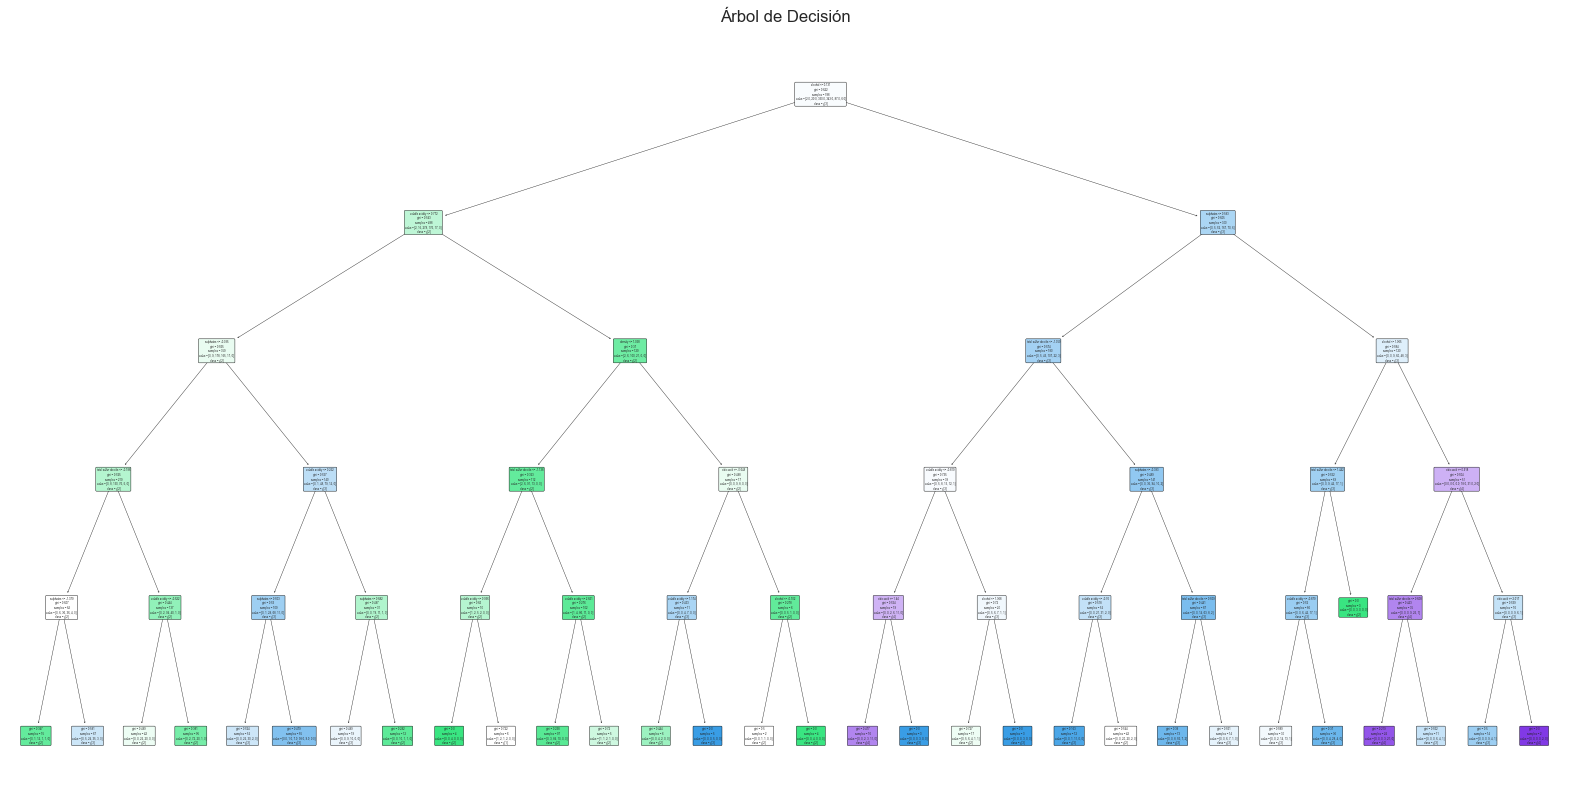

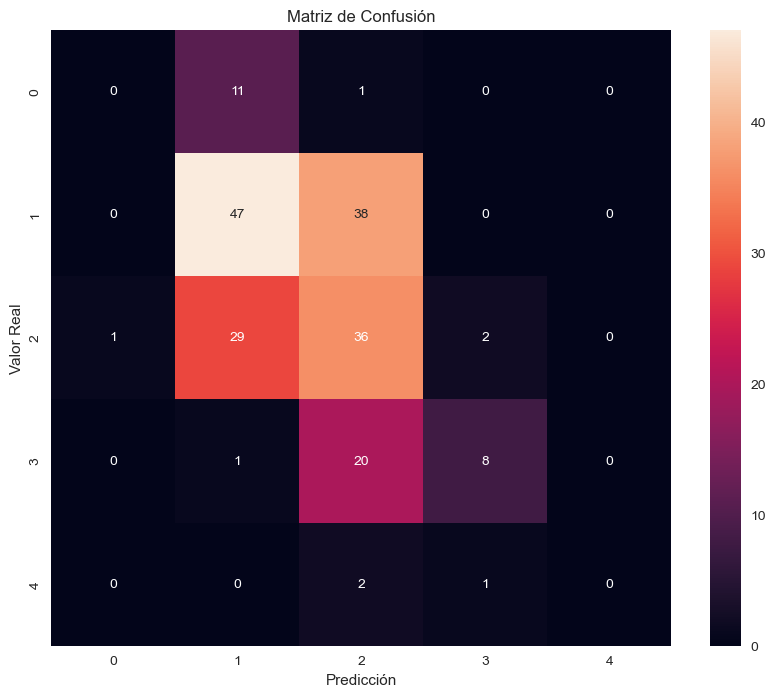

In [35]:
# 1. Cargar y explorar los datos
def load_and_explore_data(filepath):
    # Cargar el dataset
    df = pd.read_csv(filepath)
    
    print("Información del Dataset:")
    print(df.info())
    print("\nEstadísticas descriptivas:")
    print(df.describe())
    print("\nValores faltantes:")
    print(df.isnull().sum())
    
    # Mostrar las primeras filas del dataset
    print("\nPrimeras filas del dataset:")
    print(df.head())
    
    # Mostrar información sobre las clases de calidad
    print("\nClases de calidad del vino (0 a 10):")
    print(df['quality'].value_counts())
    
    return df

# 2. Visualizaciones
def create_visualizations(df):
    # Configuración de estilo
    plt.style.use('seaborn-v0_8')
    
    # Distribución de calidad
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='quality')
    plt.title('Distribución de Calidad del Vino')
    plt.xlabel('Calidad del Vino')
    plt.ylabel('Número de Ejemplares')
    plt.show()
    
    # Correlación entre variables
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matriz de Correlación')
    plt.tight_layout()
    plt.show()
    
    # Box plots para detectar outliers
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df.columns[:-1], 1):
        plt.subplot(4, 3, i)
        sns.boxplot(data=df, y=column)
        plt.title(column)
    plt.tight_layout()
    plt.show()

# 3. Preprocesamiento
def preprocess_data(df):
    # Eliminar duplicados
    df = df.drop_duplicates()
    
    # Manejar outliers usando IQR
    for column in df.columns[:-1]:  # Excluimos la columna 'quality'
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    
    # Separar features y target
    X = df.drop('quality', axis=1)
    y = df['quality']
    
    # Escalar características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    return X_scaled, y

# 4. Selección de características
def select_features(X, y, k=6):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()].tolist()
    
    print("\nCaracterísticas seleccionadas:")
    print(selected_features)
    
    return X_selected, selected_features

# 5. Entrenamiento y evaluación del modelo
def train_and_evaluate_model(X, y):
    # División train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entrenamiento del modelo
    dt = DecisionTreeClassifier(random_state=42, 
                              max_depth=5,
                              min_samples_split=5,
                              min_samples_leaf=2)
    dt.fit(X_train, y_train)
    
    # Predicciones
    y_pred = dt.predict(X_test)
    
    # Métricas
    print("\nMétricas de evaluación:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.3f}")
    
    return dt, X_train, X_test, y_test, y_pred

# 6. Visualización del árbol
def visualize_tree(model, feature_names):
    plt.figure(figsize=(20,10))
    plot_tree(model, feature_names=feature_names, class_names=True, 
             filled=True, rounded=True)
    plt.title('Árbol de Decisión')
    plt.show()

# Ejecución principal
def main():
    # Cargar y explorar datos
    df = load_and_explore_data('C:\\Users\\BRAYAN\\winequality-red.csv')
    
    # Crear visualizaciones iniciales
    create_visualizations(df)
    
    # Preprocesar datos
    X_scaled, y = preprocess_data(df)
    
    # Seleccionar características
    X_selected, selected_features = select_features(X_scaled, y)
    
    # Entrenar y evaluar modelo
    model, X_train, X_test, y_test, y_pred = train_and_evaluate_model(X_selected, y)
    
    # Visualizar árbol
    visualize_tree(model, selected_features)
    
    # Matriz de confusión
    plt.figure(figsize=(10,8))
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

if __name__ == "__main__":
    main()